In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd


In [2]:
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

Waves representation

Frequency, Amplitude, time_to_plot, sample_rate

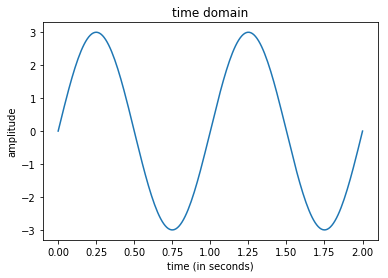

In [3]:
freq = 1
amplitude = 3
time_to_plot = 2
sample_rate = 100

num_samples = sample_rate * time_to_plot

t = np.linspace(0, time_to_plot, num_samples)
signal = [amplitude * np.sin(freq * i * 2*np.pi) for i in t]

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='time domain')
plt.plot(t, signal)

#### In the context of sound, what would a wave like this represent?
Answer: Changes in air pressure  
* When the graph is above x=0, the pressure of the air is more than "normal" (air is moving toward you)  
* When the graph is below x=0, the pressure of the air is less than "normal" (air is moving away from you)  

### Example of real sound wave

Reading an sound file for iPython Analysis. This exploration is limited.

* Wave File with SciPy package _(Not finished)_

In [4]:
# import scipy.io.wavfile as scw

# (sample_rate, input_signal) = scipy.io.wavfile.read("../data/Sound/KANATITSA_Chichovite_Konye.wav")
# time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)

# setup_graph(title='Ah Terminal sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
# _ = plt.plot(time_array[1:400], input_signal[1:400])

Easier method with librosa, package for music and audio processing by Brian McFee. Basic usage tutorial here: http://musicinformationretrieval.com/ipython_audio.html

In [5]:
import urllib
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, pandas, librosa

urllib.urlretrieve(
    'http://audio.musicinformationretrieval.com/simpleLoop.wav',
        filename='simpleLoop.wav')

('simpleLoop.wav', <httplib.HTTPMessage instance at 0x7f32cc55b998>)

In [6]:
%ls *.wav

x, fs = librosa.load('simpleLoop.wav')
print x.shape
print fs

simpleLoop.wav
(66150,)
22050


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


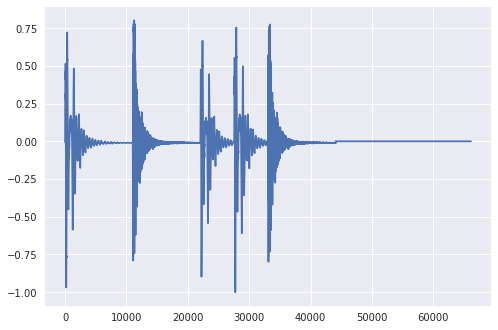

In [7]:
plt.plot(x)

In [10]:
from IPython.display import Audio

Audio('simpleLoop.wav')  


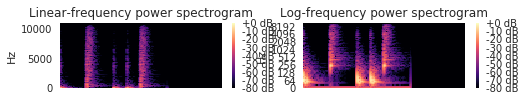

In [8]:
import librosa.display
# Spectrum Amplitude
D = librosa.amplitude_to_db(librosa.stft(x), ref=np.max)
plt.subplot(4, 2, 1)
# Linear
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
# Log
plt.subplot(4, 2, 2)
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

# Case study track

Ivan Shopov - Chichovite Konye

In [9]:
# Visualize an STFT power spectrum

import matplotlib.pyplot as plt
y, sr = librosa.load('../data/Sound/KANATITSA_Chichovite_Konye.wav')


In [10]:
plt.figure(figsize=(60, 30))


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2499: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


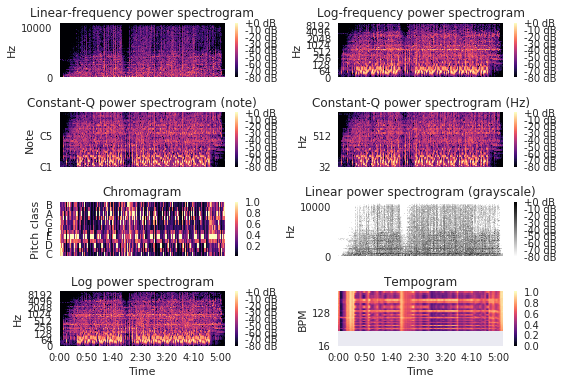

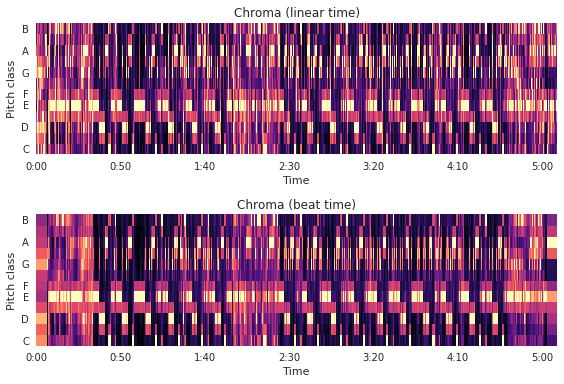

In [11]:
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

# Or on a logarithmic scale

plt.subplot(4, 2, 2)
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

# Or use a CQT scale

CQT = librosa.amplitude_to_db(librosa.cqt(y, sr=sr), ref=np.max)
plt.subplot(4, 2, 3)
librosa.display.specshow(CQT, y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (note)')

plt.subplot(4, 2, 4)
librosa.display.specshow(CQT, y_axis='cqt_hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (Hz)')

# Draw a chromagram with pitch classes

C = librosa.feature.chroma_cqt(y=y, sr=sr)
plt.subplot(4, 2, 5)
librosa.display.specshow(C, y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')

# Force a grayscale colormap (white -> black)

plt.subplot(4, 2, 6)
librosa.display.specshow(D, cmap='gray_r', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear power spectrogram (grayscale)')

# Draw time markers automatically

plt.subplot(4, 2, 7)
librosa.display.specshow(D, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log power spectrogram')

# Draw a tempogram with BPM markers

plt.subplot(4, 2, 8)
Tgram = librosa.feature.tempogram(y=y, sr=sr)
librosa.display.specshow(Tgram, x_axis='time', y_axis='tempo')
plt.colorbar()
plt.title('Tempogram')
plt.tight_layout()

# Draw beat-synchronous chroma in natural time

plt.figure()
tempo, beat_f = librosa.beat.beat_track(y=y, sr=sr, trim=False)
beat_f = librosa.util.fix_frames(beat_f, x_max=C.shape[1])
Csync = librosa.util.sync(C, beat_f, aggregate=np.median)
beat_t = librosa.frames_to_time(beat_f, sr=sr)
ax1 = plt.subplot(2,1,1)
librosa.display.specshow(C, y_axis='chroma', x_axis='time')
plt.title('Chroma (linear time)')
ax2 = plt.subplot(2,1,2, sharex=ax1)
librosa.display.specshow(Csync, y_axis='chroma', x_axis='time',
                         x_coords=beat_t)
plt.title('Chroma (beat time)')
plt.tight_layout()

# OpenFrameworks Sound Analysis

In [14]:
# Paths to input files
Konye = "../data/Sound/KANATITSA_Chichovite_Konye.wav"
Konye_ofAnalysis_csv = "../data/Sound/ofAudioAnalyzieOutput_2_.csv"
Konye_ofAnalysis_csv_smooth = "../data/Sound/ofAudioAnalyzieOutput_2_smooth_.csv"

# load CSVs to pandas DataFrame
df_ofA_s = pd.read_csv(Konye_ofAnalysis_csv)
df_ofA_ss = pd.read_csv(Konye_ofAnalysis_csv_smooth)

In [15]:
# Drop the empty rows/cells
df_ofA_s.dropna(how="all", inplace=True) 
# Display the data table
df_ofA_ss 

rms     power   pitchFreq   pitchConf   specComp   strongPeak  \
0      0.026884  0.003768     175.061    0.048877        0.0     0.001910   
1      0.050501  0.003580     342.328    0.093968        0.0     0.002865   
2      0.072926  0.003401     501.232    0.136805        0.0     0.003773   
3      0.093758  0.003231     653.782    0.176110        0.0     0.005144   
4      0.113889  0.003069     801.002    0.215407        0.0     0.006698   
5      0.132946  0.002916     940.861    0.252740        0.0     0.008175   
6      0.151641  0.003455    1074.240    0.288208        0.0     0.010741   
7      0.169022  0.003282    1199.720    0.322001        0.0     0.012828   
8      0.186847  0.005669    1317.890    0.354845        0.0     0.016940   
9      0.203395  0.007167    1432.790    0.385940        0.0     0.018950   
10     0.218009  0.006808    1539.740    0.409270        0.0     0.019179   
11     0.230920  0.006468    1641.150    0.433526        0.0     0.018220   
12     0.243035  0.006145    1739.610    0.457672        0.0     0.018457   
13     0.254361  0.005837    1833.150    0.480610        0.0     0.018682   
14     0.263342  0.005545    1918.720    0.496607        0.0     0.018215   
15     0.271448  0.005268    2000.010    0.511808        0.0     0.017772   
16     0.279343  0.005005    2068.550    0.515295        0.0     0.017361   
17     0.286844  0.004755    2133.670    0.518607        0.0     0.016971   
18     0.294005  0.004517    2198.470    0.523353        0.0     0.017099   
19     0.300099  0.004291    2264.100    0.528437        0.0     0.016326   
20     0.306204  0.004076    2239.540    0.516604        0.0     0.015510   
21     0.311988  0.003873    2216.210    0.505361        0.0     0.014735   
22     0.317455  0.003679    2270.750    0.498315        0.0     0.013998   
23     0.323206  0.003495    2189.540    0.490387        0.0     0.013298   
24     0.330941  0.003320    2254.540    0.491865        0.0     0.012729   
25     0.337865  0.003154    2316.280    0.493281        0.0     0.012183   
26     0.342458  0.002997    2374.110    0.497712        0.0     0.011574   
27     0.347590  0.002847    2433.890    0.512665        0.0     0.011704   
28     0.351649  0.002704    2490.690    0.526874        0.0     0.011827   
29     0.357056  0.002569    2542.060    0.517987        0.0     0.011345   
...         ...       ...         ...         ...        ...          ...   
19150  0.904223  0.808447     515.182    0.169271       17.0     8.819970   
19151  0.904223  0.808447     515.182    0.169271       17.0     8.819970   
19152  0.904223  0.808447     515.182    0.169271       17.0     8.819970   
19153  0.904223  0.808447     515.182    0.169271       17.0     8.819970   
19154  0.904223  0.808447     515.182    0.169271       17.0     8.819970   
19155  0.904223  0.808447     515.182    0.169271       17.0     8.819970   
19156  0.904223  0.808447     515.182    0.169271       17.0     8.819970   
19157  0.904223  0.808447     515.182    0.169271       17.0     8.819970   
19158  0.904223  0.808447     515.182    0.169271       17.0     8.819970   
19159  0.904223  0.808447     515.182    0.169271       17.0     8.819970   
19160  0.904223  0.808447     515.182    0.169271       17.0     8.819970   
19161  0.904223  0.808447     515.182    0.169271       17.0     8.819970   
19162  0.904223  0.808447     515.182    0.169271       17.0     8.819970   
19163  0.904223  0.808447     515.182    0.169271       17.0     8.819970   
19164  0.904223  0.808447     515.182    0.169271       17.0     8.819970   
19165  0.904223  0.808447     515.182    0.169271       17.0     8.819970   
19166  0.904223  0.808447     515.182    0.169271       17.0     8.819970   
19167  0.904223  0.808447     515.182    0.169271       17.0     8.819970   
19168  0.904223  0.808447     515.182    0.169271       17.0     8.819970   
19169  0.904223  0.808447     515.182    0.169271       17.0     8.819970   
19170  0

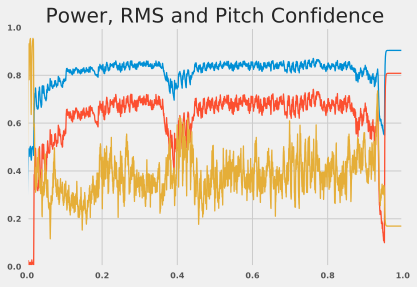

In [303]:
# No Smoothing Values
df_rms = df_ofA_s[0:]['rms']
df_power = df_ofA_s[0:][' power']
df_pitchConf = df_ofA_s[0:][' pitchConf']
df_pitchFreq = df_ofA_s[0:][' pitchFreq']
df_pitchFreqNorm = df_ofA_s[0:]['  pitchFreqNorm']

df_specComp = df_ofA_s[0:][' specComp']
df_strongPeak = df_ofA_s[0:][' strongPeak']
df_strongDecay = df_ofA_s[0:]['  strongDecay']


# ------ Smoothed values -------
df_rms_s = df_ofA_ss[0:]['rms']
df_power_s = df_ofA_ss[0:][' power']
df_pitchConf_s = df_ofA_ss[0:][' pitchConf']
df_pitchFreq_s = df_ofA_ss[0:][' pitchFreq']
df_pitchFreqNorm_s = df_ofA_ss[0:]['  pitchFreqNorm']

df_specComp_s = df_ofA_ss[0:][' specComp']
df_strongPeak_s = df_ofA_ss[0:][' strongPeak']
df_strongDecay_s = df_ofA_ss[0:]['  strongDecay']


# 
freq = 15
amplitude = 1
time_to_plot = 166.79
time_to_plot_s = 1
sample_rate = 115
num_samples = sample_rate * time_to_plot
t = np.linspace(0, time_to_plot_s, num_samples)
signal = [amplitude * np.sin(freq * i * 2*np.pi) for i in t]

n = len(df_rms)
Fs = 150
T = n/Fs

# setup_graph(x_label='timeline ', y_label='amplitude', title='time domain')

# SVG
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.plot(t, df_rms_s, linewidth=1.3)
plt.plot(t, df_power_s, linewidth=1.3)
plt.plot(t, df_pitchConf_s, linewidth=1.3)
plt.title('Power, RMS and Pitch Confidence')

# plt.plot(t[0:17890], df_rms_s[0:17890], linewidth=1.3)
# plt.plot(t[0:17890], df_power_s[0:17890], linewidth=1.3)
# plt.plot(t[0:17890], df_pitchConf_s[0:17890], linewidth=1.3)

In [264]:
# Style Plot
plt.rcParams['font.family'] = 'Ubuntu'
# plt.style.available

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

plt.matplotlib.rc('font', **font)



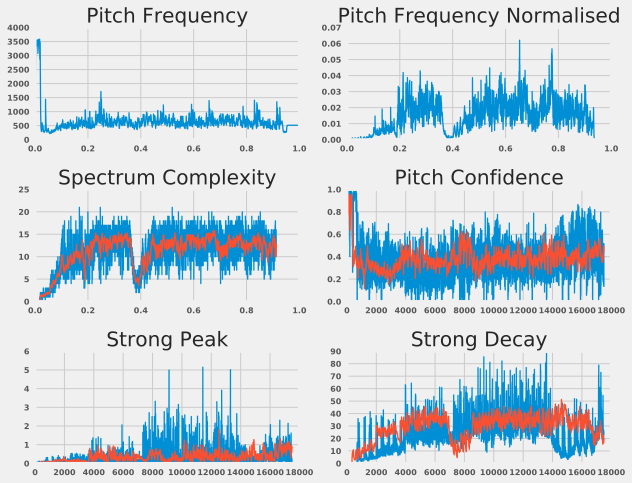

In [318]:
plt.figure(figsize=(9,9))

plt.subplot(4, 2, 1)
# plt.plot(df_pitchFreq)
plt.plot(t, df_pitchFreq_s, linewidth=1.3)
# plt.legend(fontsize=20) # using a size in points
plt.title('Pitch Frequency')

plt.subplot(4, 2, 2)
# plt.plot( df_pitchFreqNorm[0:9200])
plt.plot(t[0:18160], df_pitchFreqNorm_s[0:18160], linewidth=1.3)
plt.title('Pitch Frequency Normalised')

plt.subplot(4, 2, 3)
plt.plot(t[0:17500], df_specComp[0:17500], linewidth=1.3)
plt.plot(t[0:17500], df_specComp_s[0:17500], linewidth=1.3)
plt.title('Spectrum Complexity')

plt.subplot(4, 2, 4)
plt.plot(df_pitchConf[0:8750], linewidth=1.3)
plt.plot(df_pitchConf_s[0:17500], linewidth=1.3)
plt.title('Pitch Confidence')

plt.subplot(4, 2, 5)
plt.plot(df_strongPeak[0:8750], linewidth=1.3)
plt.plot(df_strongPeak_s[0:17500], linewidth=1.3)
plt.title('Strong Peak')

plt.subplot(4, 2, 6)
plt.plot(df_strongDecay[0:8750], linewidth=1.3)
plt.plot(df_strongDecay_s[0:17500], linewidth=1.3)
plt.title('Strong Decay')


# plt.figure.tight_layout()
plt.tight_layout()
# plt.figure(figsize=(120,60))
plt.show()

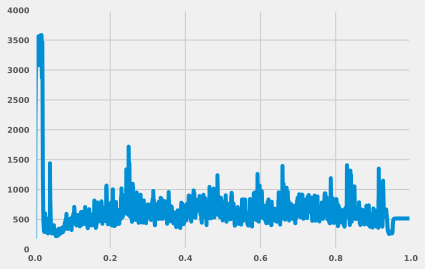

In [271]:
plt.plot(t,df_pitchFreq_s)

plt.show()

## Plotting the Tone

# FFT

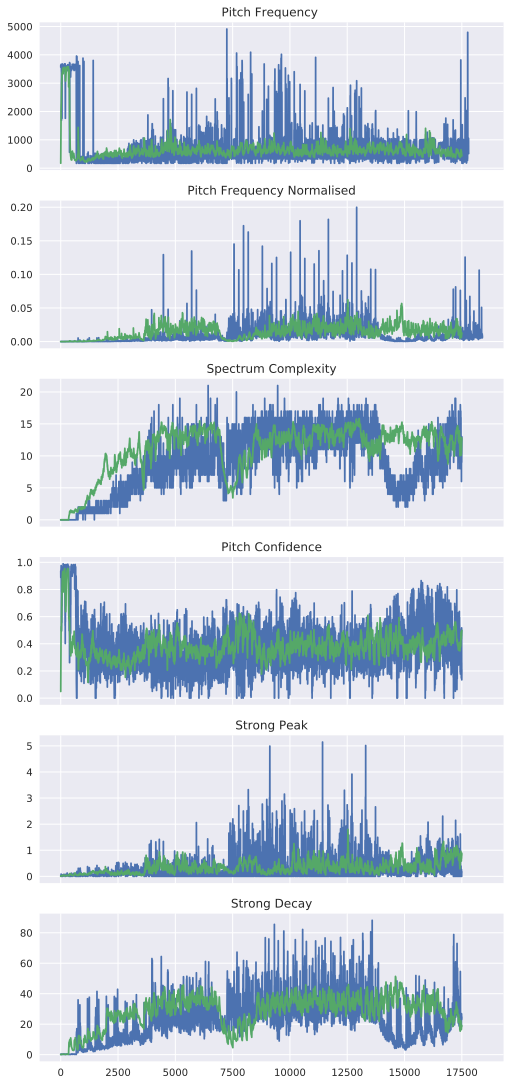

In [176]:
# plt.figure(figsize=(120,60))
# plt.figure(num=None, figsize=(40, 10) , dpi=160, facecolor='w', edgecolor='k')
# f, axarr = plt.subplots(1,2, gridspec_kw = {'width_ratios':[3, 1]})

f, axarr = plt.subplots(6,figsize=(7,15), sharex=True)
# f, axarr = plot.subplot2grid((6, 1), (0, 0))



axarr[0].plot(df_pitchFreq[0:8900])
axarr[0].plot(df_pitchFreq_s[0:17500])
axarr[0].set_title('Pitch Frequency ')

axarr[1].plot( df_pitchFreqNorm[0:9200])
axarr[1].plot( df_pitchFreqNorm_s[0:17500])
axarr[1].set_title('Pitch Frequency Normalised')

axarr[2].plot(df_specComp[0:8750])
axarr[2].plot(df_specComp_s[0:17500])
axarr[2].set_title('Spectrum Complexity')

axarr[3].plot(df_pitchConf[0:8750])
axarr[3].plot(df_pitchConf_s[0:17500])
axarr[3].set_title('Pitch Confidence')

axarr[4].plot(df_strongPeak[0:8750])
axarr[4].plot(df_strongPeak_s[0:17500])
axarr[4].set_title('Strong Peak')

axarr[5].plot(df_strongDecay[0:8750])
axarr[5].plot(df_strongDecay_s[0:17500])
axarr[5].set_title('Strong Decay')

f.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0, )
# f.figure(figsize=(9,19))
# f
# f.subplotpars(2,1, gridspec_kw = {'height_ratios':[1, 3]}, sharex=True)
plt.show()



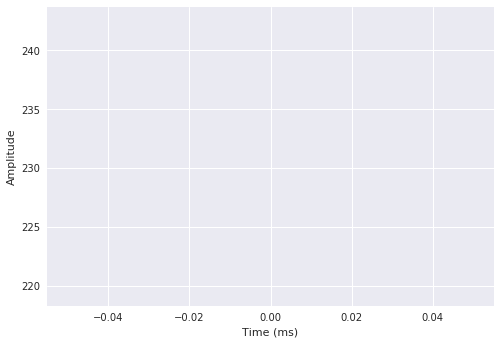

In [32]:
sampleFreq, kSound = scw.read(Konye)

KonyeDataType = kSound.dtype

kSound = kSound / (2.**15)
kSoundShape = kSound.shape
samplePoints = float(kSound.shape[0])

signalDuration = kSound.shape[0] / sampleFreq
kSoundOneChannel = kSound[:,0]

# timeArray = np.arange(0, samplePoints,1 )
# timeArray = time_array / sampleFreq
# timeArray = timeArray*1000

plt.plot(signalDuration, color='G')
plt.xlabel('Time (ms)')
plt.ylabel("Amplitude")
plt.show()


In [69]:
from scipy.fftpack import fft, ifft


/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


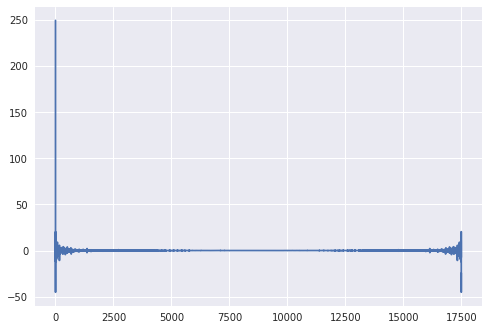

In [70]:
fft_pc = fft(df_pitchFreqNorm_s[0:17500])
plt.plot(fft_pc)